In [ ]:
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

In [ ]:
# ddd = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MHPT/Data/DATASETS/Choy's/PATIENT.csv")
# ddd['MentalHealth'].value_counts()

In [ ]:
# df_patient['MentalHealth'].value_counts()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_patient = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MHPT/Data/datasets/patient(MT).csv')
df_patientE = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MHPT/Data/datasets/EMOTIONS/PATIENT_EMOTIONS.csv')

df_nonPatient = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MHPT/Data/datasets/non_patient.csv')
df_nonPatientE = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MHPT/Data/datasets/EMOTIONS/NP_ALL.csv')

<ipython-input-6-5add2b6bed15>:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_nonPatient = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MHPT/Data/datasets/non_patient.csv')


## Data cheking

In [ ]:
print("\n********************************")
display(df_patient)
print("\n********************************")
display(df_patientE)

print("\n********************************")
display(df_nonPatient)
print("\n********************************")
display(df_nonPatientE)


********************************


,Date,User,text,LikeCount,RetweetCount,ReplyCount,ViewCount,Place,Hashtags,PCS_patient,MentalHealth
0,2022-12-31 23:52:11+00:00,BarelyStandin,"My long covid walk. The leg pain, spasms &amp;...",0.0,0.0,0.0,54.0,NaN,"['LongCovid', 'TikTok']",1,0
1,2022-12-31 23:52:02+00:00,SChazaq,@JkkCalifornia @pacortez16 @fitterhappierAJ @D...,0.0,0.0,0.0,20.0,NaN,NaN,1,0
2,2022-12-31 23:46:48+00:00,TheExtraFiles,SO Thankful for new friendships I've made here...,25.0,4.0,0.0,1304.0,NaN,['LongCovid'],1,0
3,2022-12-31 23:40:18+00:00,daniellakrn,@prof_goldberg I felt the same way and then re...,1.0,0.0,3.0,106.0,NaN,NaN,1,0
4,2022-12-31 23:39:36+00:00,PutinHarrass,@MarinaSilver6 I started exhibiting symptoms 3...,3.0,0.0,0.0,64.0,NaN,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...
195471,2020-06-15 12:20:23+00:00,KittyVons,@WajahatAli I have a mild case. Didn't need ho...,0.0,0.0,0.0,NaN,NaN,NaN,1,2
195472,2020-06-05 01:33:23+00:00,Kaija_Rayne,@DiannaLGunn I keep thinking I'm getting bette...,1.0,0.0,1.0,NaN,NaN,NaN,1,1
195473,2020-06-04 20:47:59+00:00,AdriAnneMS,"My partner is a ""long hauler."" Only felt mildl...",12.0,0.0,1.0,NaN,NaN,NaN,1,1
195474,2020-06-04 16:25:40+00:00,tbtapgh,@edyong209 @RonaldKlain I’m a long hauler. The...,106.0,9.0,3.0,NaN,NaN,NaN,1,1



********************************


,Unnamed: 0,text,pred,label,score,anger,disgust,fear,joy,neutral,sadness,surprise
0,0,"My long covid walk. The leg pain, spasms &amp;...",2,fear,0.774826,0.051894,0.006152,0.774826,0.004976,0.004360,0.152293,0.005499
1,1,@JkkCalifornia @pacortez16 @fitterhappierAJ @D...,0,anger,0.700843,0.700843,0.000445,0.069697,0.054431,0.005122,0.153605,0.015858
2,2,SO Thankful for new friendships I've made here...,3,joy,0.957113,0.002970,0.000172,0.004136,0.957113,0.005116,0.003476,0.027017
3,3,@prof_goldberg I felt the same way and then re...,6,surprise,0.554890,0.032573,0.003828,0.229187,0.048345,0.047660,0.083516,0.554890
4,4,@MarinaSilver6 I started exhibiting symptoms 3...,2,fear,0.767362,0.015949,0.001272,0.767362,0.005233,0.008611,0.179199,0.022373
...,...,...,...,...,...,...,...,...,...,...,...,...
195471,195471,@WajahatAli I have a mild case. Didn't need ho...,5,sadness,0.948715,0.002890,0.000561,0.007172,0.003225,0.019060,0.948715,0.018378
195472,195472,@DiannaLGunn I keep thinking I'm getting bette...,2,fear,0.670037,0.056970,0.001309,0.670037,0.014501,0.005234,0.237974,0.013975
195473,195473,"My partner is a ""long hauler."" Only felt mildl...",4,neutral,0.404697,0.008231,0.253639,0.079531,0.006132,0.404697,0.073116,0.174656
195474,195474,@edyong209 @RonaldKlain I’m a long hauler. The...,2,fear,0.963096,0.022861,0.000260,0.963096,0.004624,0.000717,0.005332,0.003109



********************************


,Date,User,text,LikeCount,RetweetCount,ReplyCount,ViewCount,Place,Hashtags,PCS_patient
0,2022-12-31 23:59:17+00:00,RhonaBCoaching,Wishing you all a very happy and healthy 2023!...,0.0,0.0,0.0,67.0,NaN,"['yearend', 'celebrate', 'newyear2023', 'newye...",0
1,2022-12-31 23:59:16+00:00,ChrisWexler,@HonorUkb @_HeartofGrace_ @resiapretorius @dbk...,0.0,0.0,1.0,18.0,NaN,NaN,0
2,2022-12-31 23:57:31+00:00,ClagueNjc36,Happy New Year to all. Here's to answers to th...,6.0,0.0,0.0,226.0,NaN,"['ME', 'longcovid']",0
3,2022-12-31 23:57:02+00:00,MyLyme_ca,"Finally, we rounded out 2022 w/ exciting news ...",2.0,0.0,1.0,914.0,NaN,"['ChronicLyme', 'LongCovid']",0
4,2022-12-31 23:56:53+00:00,sansIumiere,oh lord it seems like i might actually be sick...,0.0,0.0,0.0,26.0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...
2160300,2020-05-05 06:58:07+00:00,drivecomau,"LONG-TERM REVIEW: In a pinch, can Hyundai's co...",1.0,0.0,0.0,NaN,NaN,NaN,0
2160301,2020-05-05 00:43:01+00:00,RenderHub3D,Ford H-Series HD-950 Semi Truck Sleeper Cab 19...,6.0,0.0,0.0,NaN,NaN,"['ford', 'semi', 'truck', 'tractor', 'longhaul...",0
2160302,2020-05-04 07:14:52+00:00,spotnrides,Milk collecting spots and the milk haulers bot...,0.0,0.0,0.0,NaN,NaN,NaN,0
2160303,2020-05-01 17:14:35+00:00,CandysFamilyRV,Become A Part Of The Keystone Nation!\n🤜 Built...,0.0,0.0,0.0,NaN,NaN,NaN,0



********************************


,text,pred,label,score,anger,disgust,fear,joy,neutral,sadness,surprise,Date
0,Wishing you all a very happy and healthy 2023!...,2,fear,0.768439,0.026753,0.000483,0.768439,0.187685,0.001192,0.013037,0.002413,2022-12-31 23:59:17+00:00
1,@HonorUkb @_HeartofGrace_ @resiapretorius @dbk...,2,fear,0.860150,0.031553,0.000634,0.860150,0.018969,0.011053,0.061723,0.015918,2022-12-31 23:59:16+00:00
2,Happy New Year to all. Here's to answers to th...,3,joy,0.922467,0.009135,0.000256,0.022218,0.922467,0.007589,0.007425,0.030911,2022-12-31 23:57:31+00:00
3,"Finally, we rounded out 2022 w/ exciting news ...",3,joy,0.510262,0.138900,0.000984,0.135084,0.510262,0.029238,0.099292,0.086238,2022-12-31 23:57:02+00:00
4,oh lord it seems like i might actually be sick...,6,surprise,0.953886,0.003940,0.005426,0.007671,0.002705,0.017149,0.009223,0.953886,2022-12-31 23:56:53+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
2160300,"LONG-TERM REVIEW: In a pinch, can Hyundai's co...",2,fear,0.410280,0.063551,0.013353,0.410280,0.011530,0.329972,0.104467,0.066847,2020-05-05 06:58:07+00:00
2160301,Ford H-Series HD-950 Semi Truck Sleeper Cab 19...,2,fear,0.966360,0.019187,0.000283,0.966360,0.007104,0.000698,0.004828,0.001539,2020-05-05 00:43:01+00:00
2160302,Milk collecting spots and the milk haulers bot...,4,neutral,0.758735,0.014399,0.002468,0.037832,0.003811,0.758735,0.118501,0.064254,2020-05-04 07:14:52+00:00
2160303,Become A Part Of The Keystone Nation!\n🤜 Built...,4,neutral,0.817735,0.008366,0.001222,0.006691,0.057711,0.817735,0.007282,0.100993,2020-05-01 17:14:35+00:00


In [ ]:
df_patient['label'] = df_patientE['label']
df_nonPatient['label'] = df_nonPatientE['label']

# create a dictionary to map the old labels to the new labels
emotion_labels = {'anger': 'Anger', 'neutral': 'Neutral', 'disgust': 'Disgust', 'fear': 'Fear', 'joy': 'Joy', 'sadness': 'Sadness', 'surprise': 'Surprise'}

# use the replace method to replace the old labels with the new labels
df_patient['label'] = df_patient['label'].replace(emotion_labels)
df_nonPatient['label'] = df_nonPatient['label'].replace(emotion_labels)

display(df_patient)
display(df_nonPatient)

,Date,User,text,LikeCount,RetweetCount,ReplyCount,ViewCount,Place,Hashtags,PCS_patient,MentalHealth,label
0,2022-12-31 23:52:11+00:00,BarelyStandin,"My long covid walk. The leg pain, spasms &amp;...",0.0,0.0,0.0,54.0,NaN,"['LongCovid', 'TikTok']",1,0,Fear
1,2022-12-31 23:52:02+00:00,SChazaq,@JkkCalifornia @pacortez16 @fitterhappierAJ @D...,0.0,0.0,0.0,20.0,NaN,NaN,1,0,Anger
2,2022-12-31 23:46:48+00:00,TheExtraFiles,SO Thankful for new friendships I've made here...,25.0,4.0,0.0,1304.0,NaN,['LongCovid'],1,0,Joy
3,2022-12-31 23:40:18+00:00,daniellakrn,@prof_goldberg I felt the same way and then re...,1.0,0.0,3.0,106.0,NaN,NaN,1,0,Surprise
4,2022-12-31 23:39:36+00:00,PutinHarrass,@MarinaSilver6 I started exhibiting symptoms 3...,3.0,0.0,0.0,64.0,NaN,NaN,1,0,Fear
...,...,...,...,...,...,...,...,...,...,...,...,...
195471,2020-06-15 12:20:23+00:00,KittyVons,@WajahatAli I have a mild case. Didn't need ho...,0.0,0.0,0.0,NaN,NaN,NaN,1,2,Sadness
195472,2020-06-05 01:33:23+00:00,Kaija_Rayne,@DiannaLGunn I keep thinking I'm getting bette...,1.0,0.0,1.0,NaN,NaN,NaN,1,1,Fear
195473,2020-06-04 20:47:59+00:00,AdriAnneMS,"My partner is a ""long hauler."" Only felt mildl...",12.0,0.0,1.0,NaN,NaN,NaN,1,1,Neutral
195474,2020-06-04 16:25:40+00:00,tbtapgh,@edyong209 @RonaldKlain I’m a long hauler. The...,106.0,9.0,3.0,NaN,NaN,NaN,1,1,Fear


,Date,User,text,LikeCount,RetweetCount,ReplyCount,ViewCount,Place,Hashtags,PCS_patient,label
0,2022-12-31 23:59:17+00:00,RhonaBCoaching,Wishing you all a very happy and healthy 2023!...,0.0,0.0,0.0,67.0,NaN,"['yearend', 'celebrate', 'newyear2023', 'newye...",0,Fear
1,2022-12-31 23:59:16+00:00,ChrisWexler,@HonorUkb @_HeartofGrace_ @resiapretorius @dbk...,0.0,0.0,1.0,18.0,NaN,NaN,0,Fear
2,2022-12-31 23:57:31+00:00,ClagueNjc36,Happy New Year to all. Here's to answers to th...,6.0,0.0,0.0,226.0,NaN,"['ME', 'longcovid']",0,Joy
3,2022-12-31 23:57:02+00:00,MyLyme_ca,"Finally, we rounded out 2022 w/ exciting news ...",2.0,0.0,1.0,914.0,NaN,"['ChronicLyme', 'LongCovid']",0,Joy
4,2022-12-31 23:56:53+00:00,sansIumiere,oh lord it seems like i might actually be sick...,0.0,0.0,0.0,26.0,NaN,NaN,0,Surprise
...,...,...,...,...,...,...,...,...,...,...,...
2160300,2020-05-05 06:58:07+00:00,drivecomau,"LONG-TERM REVIEW: In a pinch, can Hyundai's co...",1.0,0.0,0.0,NaN,NaN,NaN,0,Fear
2160301,2020-05-05 00:43:01+00:00,RenderHub3D,Ford H-Series HD-950 Semi Truck Sleeper Cab 19...,6.0,0.0,0.0,NaN,NaN,"['ford', 'semi', 'truck', 'tractor', 'longhaul...",0,Fear
2160302,2020-05-04 07:14:52+00:00,spotnrides,Milk collecting spots and the milk haulers bot...,0.0,0.0,0.0,NaN,NaN,NaN,0,Neutral
2160303,2020-05-01 17:14:35+00:00,CandysFamilyRV,Become A Part Of The Keystone Nation!\n🤜 Built...,0.0,0.0,0.0,NaN,NaN,NaN,0,Neutral


## Exploratory Analysis

### Overall distribution of emotion

In [ ]:
a = df_patient[['Date','label']]
b = df_nonPatient[['Date','label']]
c = pd.concat([a,b], axis=0)

# Get value counts and divide by total number of values
value_counts = c['label'].value_counts(normalize=True) * 100

# Print the percentages
print(value_counts)

Fear        42.575520
Sadness     20.822479
Neutral     15.028477
Anger        7.850093
Surprise     7.567002
Joy          5.272986
Disgust      0.883444
Name: label, dtype: float64


In [ ]:
df_p0 = df_patient[df_patient['MentalHealth'] == 0]
df_p1 = df_patient[df_patient['MentalHealth'] == 1]
df_p2 = df_patient[df_patient['MentalHealth'] == 2]

In [ ]:
# df_nonPatient['ViewCount'] = pd.to_numeric(df_nonPatient['ViewCount'], errors='coerce')

# calculate the average of the 'ViewCount' column
avg_viewcount = df_p2['ViewCount'].mean()
avg_viewcount

In [ ]:
# df_nonPatient['ViewCount'] = pd.to_numeric(df_nonPatient['ViewCount'], errors='coerce')

# calculate the average of the 'ViewCount' column
avg_viewcount = df_p2['ViewCount'].mean()
avg_viewcount

data_ = {'AvgLike': [14.16730901512844, 22.65508559556187, 18.344304522037778, 23.67216735636853],
        'AvgRT': [3.253904667826074, 3.3729701263192826, 2.6413279908414427, 3.575998375180888],
        'AvgReply': [1.1411188914127164, 1.695073475836297, 1.819919862621637, 2.0390718220823074],
        'AvgView': [1319.5754066277202, 1115.7368971749263, 1494.7716738197425, 1941.3597753597753],
        'Label': ['NC', 'LC', 'LC-I', 'LC-E']}

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharey=False)
fig.suptitle("Average Frequency of interections in Twitter")

# NC
sns.barplot(ax=axes[0,0], x='Label', y='AvgLike', palette = 'deep',data=data_)
axes[0,0].set_title('Likes')

# LC
sns.barplot(ax=axes[0,1], x='Label', y='AvgRT',palette = 'deep', data=data_)
axes[0,1].set_title('ReTweets')

# LC-I
sns.barplot(ax=axes[1,0], x='Label', y='AvgReply', palette = 'deep',data=data_)
axes[1,0].set_title('Reply')

# LC-E
sns.barplot(ax=axes[1,1], x='Label', y='AvgView', palette = 'deep',data=data_)
axes[1,1].set_title('Views')

plt.show()

In [ ]:
EMODIS_NP = pd.DataFrame(df_nonPatient['label'].value_counts())
EMODIS_P0 = pd.DataFrame(df_p0['label'].value_counts())
EMODIS_P1 = pd.DataFrame(df_p1['label'].value_counts())
EMODIS_P2 = pd.DataFrame(df_p2['label'].value_counts())

## Overall Distribuiton

### User Identity Distribution

In [ ]:
import plotly.express as px

data = {'x': ['NC', 'LC', 'LC-I', 'LC-E'], 'y': [2160305, 138643, 17470, 39389]}
dft = pd.DataFrame(data)

fig = px.pie(dft, values='y', names='x')
fig.update_traces(textposition='outside',textfont_size=14)
fig.show()
fig.write_image("fig1.png")

### Emotion Distribution

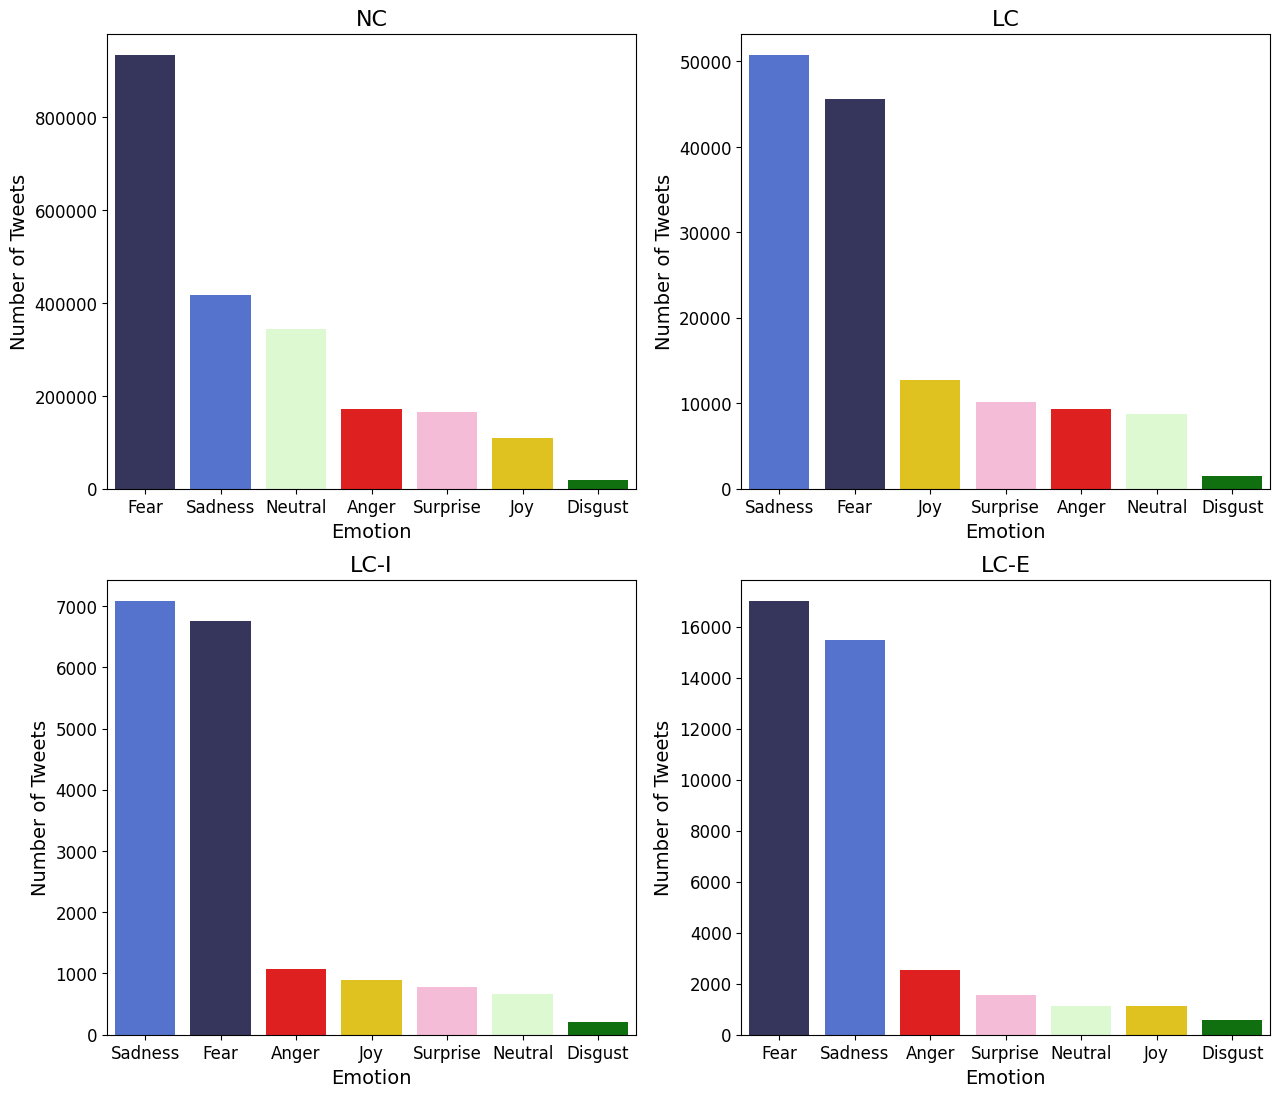

In [ ]:
colors = {'Anger': 'red', 'Neutral':'#d9ffcb','Disgust': 'green', 'Fear': '#303062', 'Joy': 'gold', 'Sadness': 'royalblue', 'Surprise': '#feb3d8'}

fig, axes = plt.subplots(2, 2, figsize=(15, 13), sharey=False)
# fig.suptitle("Distribution of Ekman's Emotions in Tweets", fontsize=20)
# plt.subplots_adjust(top=0.90) # adjust the spacing between the figure title and the subplots

# NC
sns.barplot(ax=axes[0,0], x=EMODIS_NP.index, y=EMODIS_NP.values.flatten(), palette=colors)
axes[0,0].set_title('NC', fontsize=16)
axes[0,0].set_xlabel('Emotion', fontsize=14)
axes[0,0].set_ylabel('Number of Tweets', fontsize=14)
axes[0,0].tick_params(axis='x', labelsize=12)
axes[0,0].tick_params(axis='y', labelsize=12)

# LC
sns.barplot(ax=axes[0,1], x=EMODIS_P0.index, y=EMODIS_P0.values.flatten(), palette=colors)
axes[0,1].set_title('LC', fontsize=16)
axes[0,1].set_xlabel('Emotion', fontsize=14)
axes[0,1].set_ylabel('Number of Tweets', fontsize=14)
axes[0,1].tick_params(axis='x', labelsize=12)
axes[0,1].tick_params(axis='y', labelsize=12)

# LC-I
sns.barplot(ax=axes[1,0], x=EMODIS_P1.index, y=EMODIS_P1.values.flatten(), palette=colors)
axes[1,0].set_title('LC-I', fontsize=16)
axes[1,0].set_xlabel('Emotion', fontsize=14)
axes[1,0].set_ylabel('Number of Tweets', fontsize=14)
axes[1,0].tick_params(axis='x', labelsize=12)
axes[1,0].tick_params(axis='y', labelsize=12)

# LC-E
sns.barplot(ax=axes[1,1], x=EMODIS_P2.index, y=EMODIS_P2.values.flatten(), palette=colors)
axes[1,1].set_title('LC-E', fontsize=16)
axes[1,1].set_xlabel('Emotion', fontsize=14)
axes[1,1].set_ylabel('Number of Tweets', fontsize=14)
axes[1,1].tick_params(axis='x', labelsize=12)
axes[1,1].tick_params(axis='y', labelsize=12)
plt.show()

## Trend Analysis

In [ ]:
df_patients = df_patient[['Date','User','text','MentalHealth','label']]
df_nonPatients = df_nonPatient[['Date','text','User','label']]

df_p0s = df_patients[df_patients['MentalHealth'] == 0]
df_p1s = df_patients[df_patients['MentalHealth'] == 1]
df_p2s = df_patients[df_patients['MentalHealth'] == 2]

In [ ]:
df_sorted = df_nonPatients.sort_values(by='Date',ascending=True)
df_sorted = df_sorted.reset_index(drop=True)
df_sorted = df_sorted.drop(0)
df_sorted = df_sorted.drop(2160303)
df_sorted = df_sorted.drop(2160304)
df_nonPatients = df_sorted

In [ ]:
df_nonPatients['Date'] = pd.to_datetime(df_nonPatients['Date'])

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert the date column to a datetime object
df_nonPatients['Date'] = pd.to_datetime(df_nonPatients['Date'])
# Group the dataframe by emotion and month, and count the number of tweets
grouped_df0 = df_nonPatients.groupby(['label', pd.Grouper(key='Date', freq='M')]).size().reset_index(name='count')
# Give tagging
grouped_df0['Tweet Category'] = 'NC'

# Convert the date column to a datetime object
df_p0s['Date'] = pd.to_datetime(df_p0s['Date'])
# Group the dataframe by emotion and month, and count the number of tweets
grouped_df1 = df_p0s.groupby(['label', pd.Grouper(key='Date', freq='M')]).size().reset_index(name='count')
# Give tagging
grouped_df1['Tweet Category'] = 'LC'

# Convert the date column to a datetime object
df_p1s['Date'] = pd.to_datetime(df_p1s['Date'])
# Group the dataframe by emotion and month, and count the number of tweets
grouped_df2 = df_p1s.groupby(['label', pd.Grouper(key='Date', freq='M')]).size().reset_index(name='count')
# Give tagging
grouped_df2['Tweet Category'] = 'LC-I'

# Convert the date column to a datetime object
df_p2s['Date'] = pd.to_datetime(df_p2s['Date'])
# Group the dataframe by emotion and month, and count the number of tweets
grouped_df3 = df_p2s.groupby(['label', pd.Grouper(key='Date', freq='M')]).size().reset_index(name='count')
# Give tagging
grouped_df3['Tweet Category'] = 'LC-E'

<ipython-input-20-47d99f8c7402>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-20-47d99f8c7402>:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-20-47d99f8c7402>:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
grouped_df0['Date'] = pd.to_datetime(grouped_df0['Date']).dt.strftime('%Y-%m')
grouped_df1['Date'] = pd.to_datetime(grouped_df1['Date']).dt.strftime('%Y-%m')
grouped_df2['Date'] = pd.to_datetime(grouped_df2['Date']).dt.strftime('%Y-%m')
grouped_df3['Date'] = pd.to_datetime(grouped_df3['Date']).dt.strftime('%Y-%m')

In [ ]:
grouped_df3 = grouped_df3.sort_values(by='Date', ascending=True)

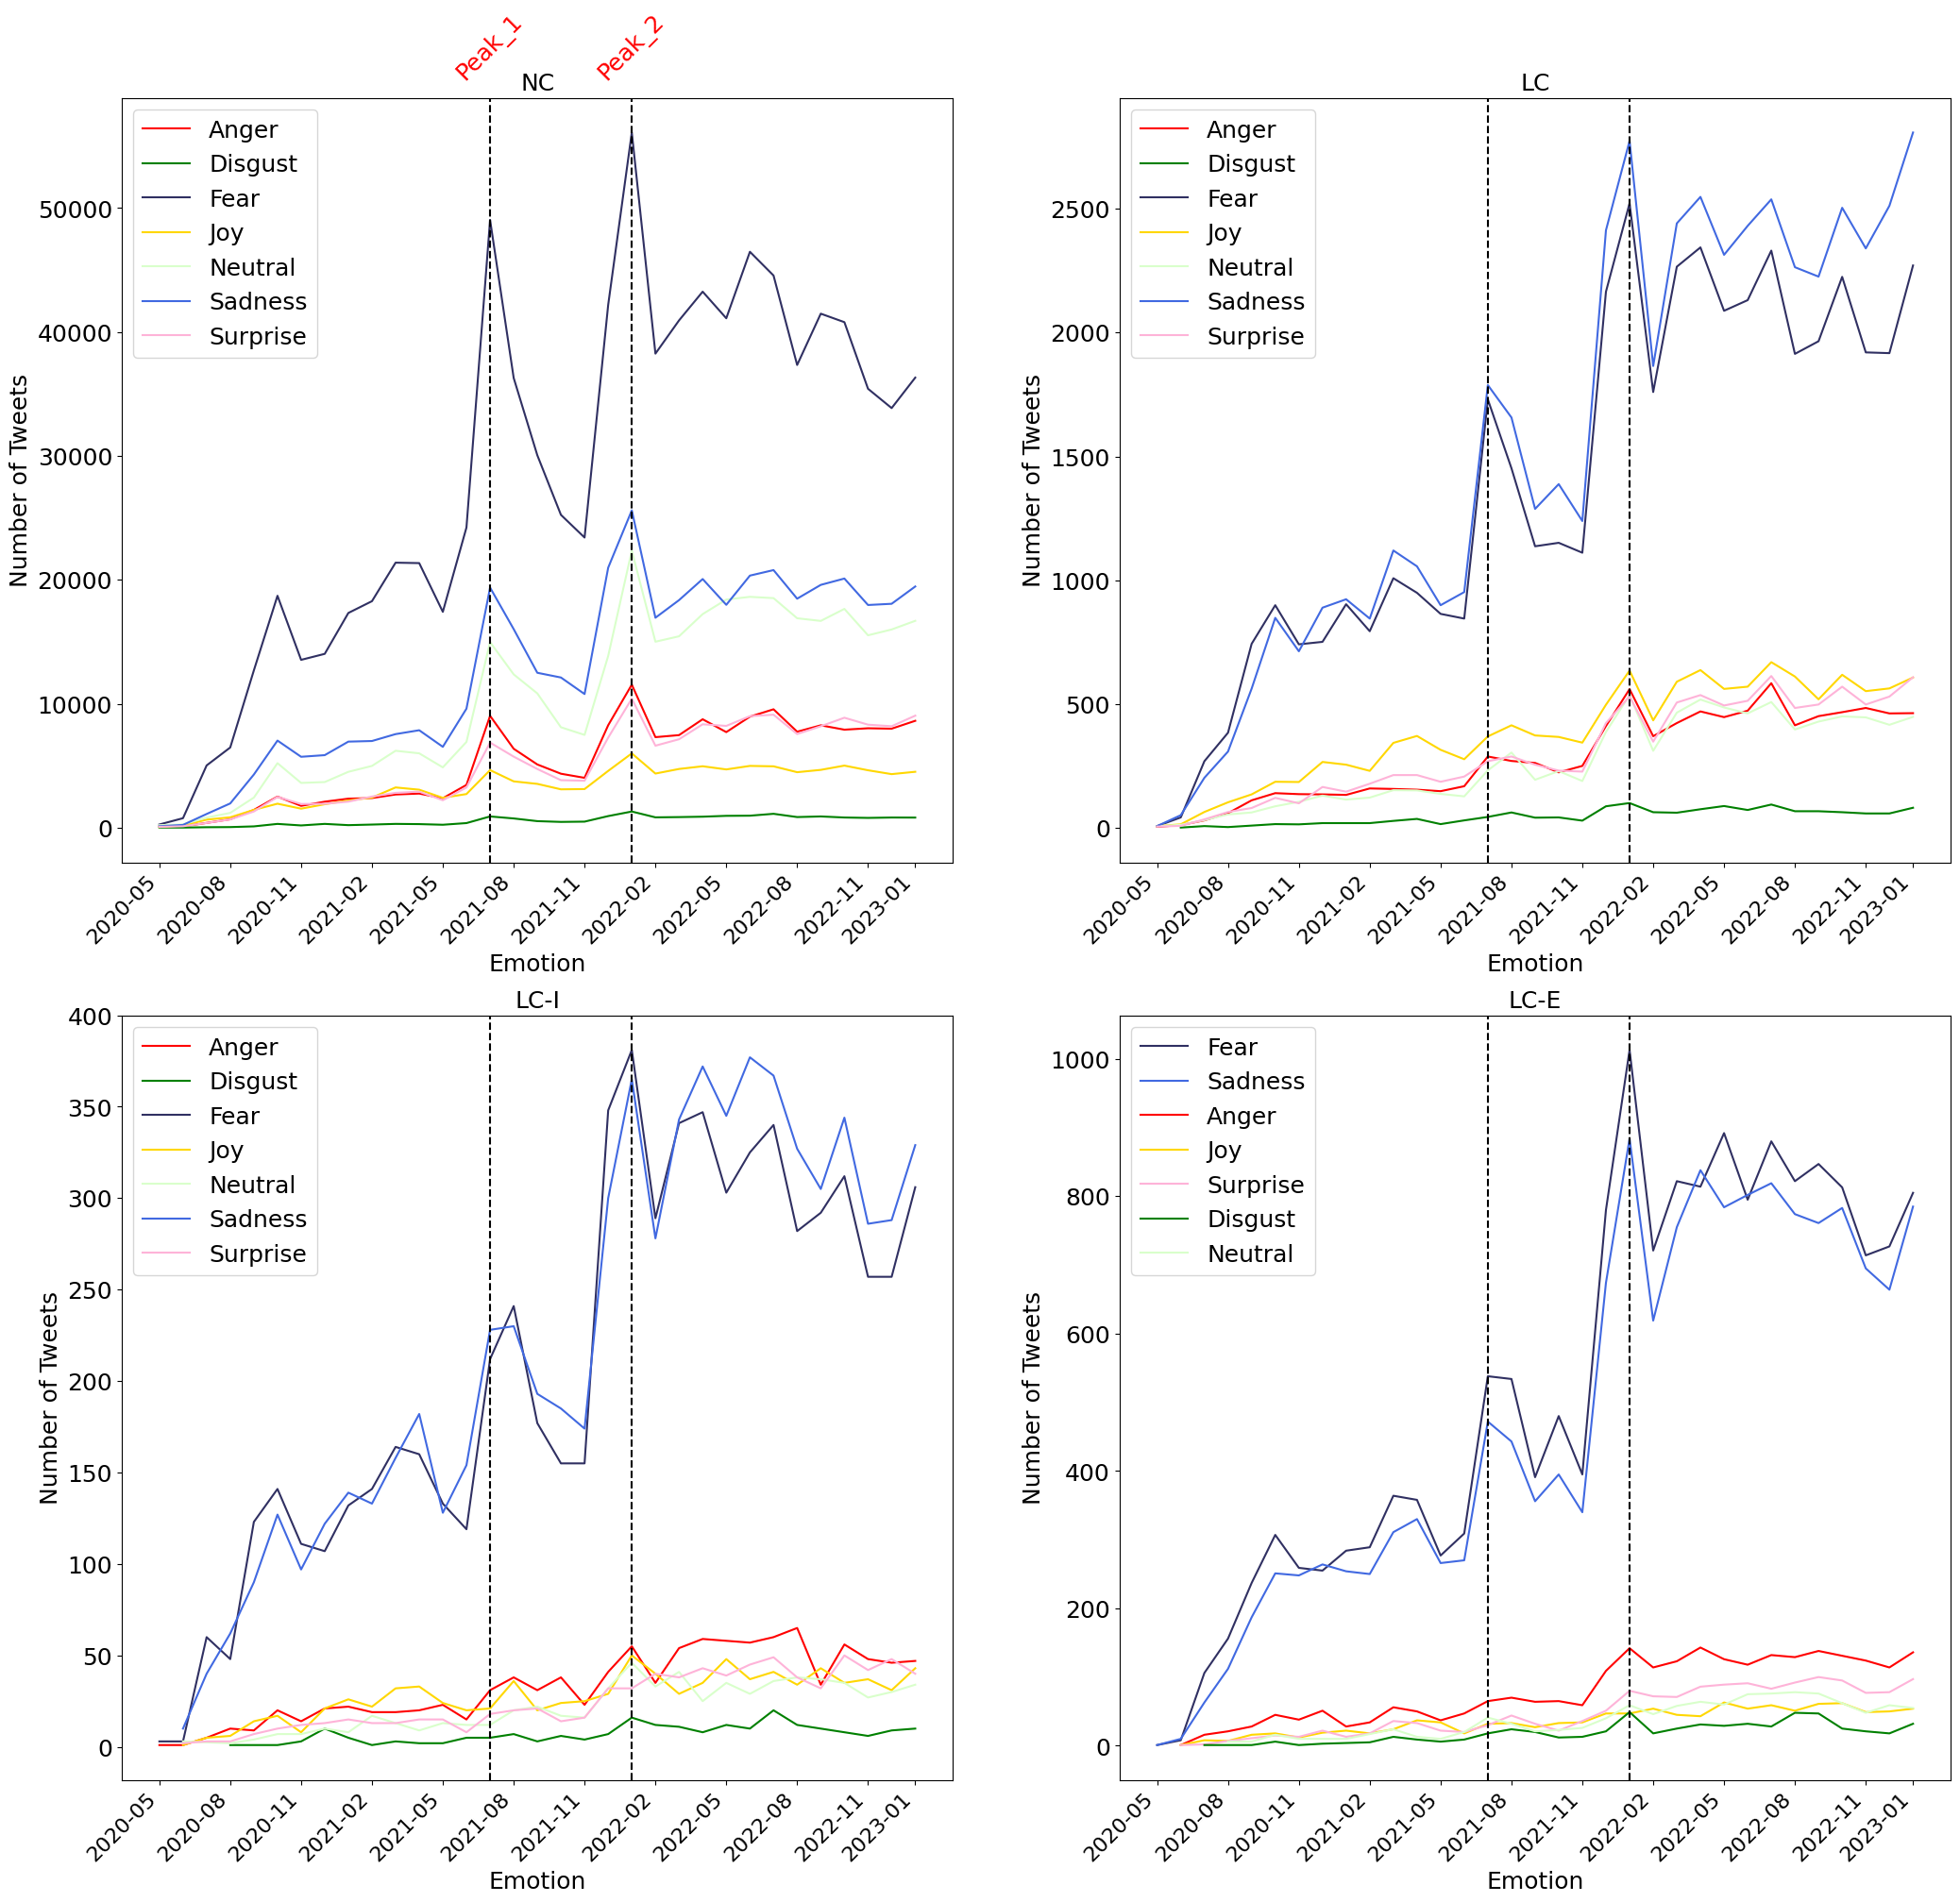

In [ ]:
colors = {'Anger': 'red', 'Neutral':'#d9ffcb','Disgust': 'green', 'Fear': '#303062', 'Joy': 'gold', 'Sadness': 'royalblue', 'Surprise': '#feb3d8'}

fig, axes = plt.subplots(2, 2, figsize=(25, 22), sharey=False)
# fig.suptitle("Frequency of Ekman's Emotions in Tweet per month ",fontsize=24)

plt.subplots_adjust(top=0.92) # adjust the spacing between the figure title and the subplots
xticks = ['2020-05', '2020-08','2020-11',
          '2021-02', '2021-05','2021-08',
          '2021-11', '2022-02','2022-05',
          '2022-08', '2022-11','2023-01']

# NC
sns.lineplot(ax = axes[0,0], x='Date', y='count', hue='label', palette=colors, data=grouped_df0)
axes[0,0].set_title('NC',fontsize=18)
axes[0,0].set_xlabel('Emotion', fontsize=18)
axes[0,0].set_ylabel('Number of Tweets', fontsize=18)
axes[0,0].tick_params(axis='x', labelsize=16)
axes[0,0].tick_params(axis='y', labelsize=18)
axes[0,0].legend(fontsize=18)
# set x-tick labels for every third element
axes[0,0].set_xticks(xticks)
axes[0,0].set_xticklabels(labels=xticks, rotation=45, ha='right')

# plot vertical lines and add labels
axes[0,0].axvline(x='2021-07', color='k', linestyle='--')
axes[0,0].axvline(x='2022-01', color='k', linestyle='--')
axes[0,0].text('2021-07', 60000, 'Peak_1', rotation=45, va='bottom', ha='center', fontsize=18, color='red')
axes[0,0].text('2022-01', 60000, 'Peak_2', rotation=45, va='bottom', ha='center', fontsize=18, color='red')


# LC
sns.lineplot(ax = axes[0,1], x='Date', y='count', hue='label', palette=colors, data=grouped_df1)
axes[0,1].set_title('LC',fontsize=18)
axes[0,1].set_xlabel('Emotion', fontsize=18)
axes[0,1].set_ylabel('Number of Tweets', fontsize=18)
axes[0,1].tick_params(axis='x', labelsize=16)
axes[0,1].tick_params(axis='y', labelsize=18)
axes[0,1].legend(fontsize=18)
# set x-tick labels for every third element
axes[0,1].set_xticks(xticks)
axes[0,1].set_xticklabels(labels=xticks, rotation=45, ha='right')

# plot vertical lines and add labels
axes[0,1].axvline(x='2021-07', color='k', linestyle='--')
axes[0,1].axvline(x='2022-01', color='k', linestyle='--')

# LC-I
sns.lineplot(ax = axes[1,0], x='Date', y='count', hue='label', palette=colors, data=grouped_df2)
axes[1,0].set_title('LC-I',fontsize=18)
axes[1,0].set_xlabel('Emotion', fontsize=18)
axes[1,0].set_ylabel('Number of Tweets', fontsize=18)
axes[1,0].tick_params(axis='x', labelsize=16)
axes[1,0].tick_params(axis='y', labelsize=18)
axes[1,0].legend(fontsize=18)
# set x-tick labels for every third element
axes[1,0].set_xticks(xticks)
axes[1,0].set_xticklabels(labels=xticks, rotation=45, ha='right')

# plot vertical lines and add labels
axes[1,0].axvline(x='2021-07', color='k', linestyle='--')
axes[1,0].axvline(x='2022-01', color='k', linestyle='--')


# LC-E
sns.lineplot(ax = axes[1,1], x='Date', y='count', hue='label', palette=colors, data=grouped_df3)
axes[1,1].set_title('LC-E',fontsize=18)
axes[1,1].set_xlabel('Emotion', fontsize=18)
axes[1,1].set_ylabel('Number of Tweets', fontsize=18)
axes[1,1].tick_params(axis='x', labelsize=16)
axes[1,1].tick_params(axis='y', labelsize=18)
axes[1,1].legend(fontsize=18)
# set x-tick labels for every third element
axes[1,1].set_xticks(xticks)
axes[1,1].set_xticklabels(labels=xticks, rotation=45, ha='right')

# plot vertical lines and add labels
axes[1,1].axvline(x='2021-07', color='k', linestyle='--')
axes[1,1].axvline(x='2022-01', color='k', linestyle='--')

plt.show()

In [ ]:
fig, ax = plt.subplots()
ax= sns.lineplot(x='Date', y='count', hue='label', data=grouped_df0)

## Distribution of counts

In [ ]:
# convert the date column to datetime format
df_nonPatients['Date'] = pd.to_datetime(df_nonPatients['Date'])
# group the tweets by month and count the frequency of tweets in each month
monthly_tweet_count = df_nonPatients.groupby(pd.Grouper(key='Date', freq='M'))['text'].count().reset_index()
# rename the columns
monthly_tweet_count0 = monthly_tweet_count.rename(columns={'Date': 'Month', 'text': 'FreqCount'})

# convert the date column to datetime format
df_p0s['Date'] = pd.to_datetime(df_p0s['Date'])
# group the tweets by month and count the frequency of tweets in each month
monthly_tweet_count = df_p0s.groupby(pd.Grouper(key='Date', freq='M'))['text'].count().reset_index()
# rename the columns
monthly_tweet_count1 = monthly_tweet_count.rename(columns={'Date': 'Month', 'text': 'FreqCount'})

# convert the date column to datetime format
df_p1s['Date'] = pd.to_datetime(df_p1s['Date'])
# group the tweets by month and count the frequency of tweets in each month
monthly_tweet_count = df_p1s.groupby(pd.Grouper(key='Date', freq='M'))['text'].count().reset_index()
# rename the columns
monthly_tweet_count2 = monthly_tweet_count.rename(columns={'Date': 'Month', 'text': 'FreqCount'})

# convert the date column to datetime format
df_p2s['Date'] = pd.to_datetime(df_p2s['Date'])
# group the tweets by month and count the frequency of tweets in each month
monthly_tweet_count = df_p2s.groupby(pd.Grouper(key='Date', freq='M'))['text'].count().reset_index()
# rename the columns
monthly_tweet_count3 = monthly_tweet_count.rename(columns={'Date': 'Month', 'text': 'FreqCount'})

In [ ]:
monthly_tweet_count0

In [ ]:
monthly_tweet_count0['Month'] = pd.to_datetime(monthly_tweet_count0['Month'])
monthly_tweet_count1['Month'] = pd.to_datetime(monthly_tweet_count1['Month'])
monthly_tweet_count2['Month'] = pd.to_datetime(monthly_tweet_count2['Month'])
monthly_tweet_count3['Month'] = pd.to_datetime(monthly_tweet_count3['Month'])

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharey=False)
fig.suptitle("Frequency of Tweet per month ")

# NC
sns.lineplot(ax = axes[0,0], x='Month', y='FreqCount', color = 'red', data=monthly_tweet_count0)
axes[0,0].set_title('NC')

# LC
sns.lineplot(ax = axes[0,1], x='Month', y='FreqCount', color = 'blue', data=monthly_tweet_count1)
axes[0,1].set_title('LC')

# LC-I
sns.lineplot(ax = axes[1,0], x='Month', y='FreqCount', color = 'green', data=monthly_tweet_count2)
axes[1,0].set_title('LC-I')

# LC-E
sns.lineplot(ax = axes[1,1], x='Month', y='FreqCount', color = 'purple', data=monthly_tweet_count3)
axes[1,1].set_title('LC-E')

plt.show()

## Topic Analysis

In [ ]:
df_patients = df_patient[['Date','text','MentalHealth']]
df_nonPatients = df_nonPatient[['Date','text']]

df_p0s = df_patients[df_patients['MentalHealth'] == 0]
df_p1s = df_patients[df_patients['MentalHealth'] == 1]
df_p2s = df_patients[df_patients['MentalHealth'] == 2]

In [ ]:
df_sorted = df_nonPatients.sort_values(by='Date',ascending=True)
df_sorted = df_sorted.reset_index(drop=True)
df_sorted = df_sorted.drop(0)
df_sorted = df_sorted.drop(2160303)
df_sorted = df_sorted.drop(2160304)
df_nonPatients = df_sorted

In [ ]:
# convert the 'Date' column to datetime format and set it as the index
df_nonPatients['Date'] = pd.to_datetime(df_nonPatients['Date'])
df_nonPatients.set_index('Date', inplace=True)

df_np_july = df_nonPatients.loc['2021-07']

In [ ]:
# convert the 'Date' column to datetime format and set it as the index
df_patients['Date'] = pd.to_datetime(df_patients['Date'])
df_patients.set_index('Date', inplace=True)

df_p_july = df_nonPatients.loc['2021-07']

In [ ]:
# Python program to generate WordCloud
 
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import re  # import regular expression module
 
 
comment_words = ''
stopwords = set(STOPWORDS)
stopwords.update(['still', 'will', 'may', 'one', 'now', 'even', 'much', 'might', 'like', 'way', 'much', 'never', 'every', 'said', 'get'])
 
# iterate through the csv file
for val in df_p_july.text.values:
     
    # remove hyperlinks using regular expressions
    val = re.sub(r'http\S+|&amp;', '', val)
 
    # typecast each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
# create a dictionary to store word frequencies
word_freq = {}
for word in comment_words.split():
    if word not in stopwords:
        if word not in word_freq:
            word_freq[word] = 1
        else:
            word_freq[word] += 1
 
# sort the dictionary by frequency and get the top 50 words
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:50]
 
# create a new string with only the top 50 words
top_words = " ".join(word[0] for word in sorted_word_freq)
 
# create the word cloud
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(top_words)
 
# plot the WordCloud image                      
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
 
plt.show()

## Resources

In [ ]:
def draw_(df,t_name):
    df1 = df.groupby(['Date','label'])['text'].count().unstack()
    df1 = pd.DataFrame(df1).fillna(0.0)
    df2 = df.groupby(['label'])['text'].count()
    df2 = pd.DataFrame(df2).fillna(0.0)
    # normalization
    # df2 = (df2 - df2.mean()) / df2.std()
    a=df1.plot(figsize=(18, 10),title=t_name)
    b=df2.plot.bar(figsize=(18, 10),rot=0,title=t_name)
    # print(a.get_legend_handles_labels())

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def draw_2(df_patient, df_non_patient, t_name1,t_name2):
    # calculate emotions counts for patient dataframe
    df1_patient = df_patient.groupby(['Date', 'label'])['text'].count().unstack()
    df1_patient = pd.DataFrame(df1_patient).fillna(0.0)
    df2_patient = df_patient.groupby(['label'])['text'].count()
    df2_patient = pd.DataFrame(df2_patient).fillna(0.0)
    
    # calculate emotions counts for non-patient dataframe
    df1_non_patient = df_non_patient.groupby(['Date', 'label'])['text'].count().unstack()
    df1_non_patient = pd.DataFrame(df1_non_patient).fillna(0.0)
    df2_non_patient = df_non_patient.groupby(['label'])['text'].count()
    df2_non_patient = pd.DataFrame(df2_non_patient).fillna(0.0)
    
    # create the bar plots using seaborn
    fig, axs = plt.subplots(ncols=2, figsize=(18, 10))
    sns.barplot(data=df2_non_patient, y=df2_non_patient.index, x='text', ax=axs[0], palette=sns.color_palette("pastel"), label='Non-Patient', orient='horizontal')
    sns.barplot(data=df2_patient, y=df2_patient.index, x='text', ax=axs[1], palette=sns.color_palette('tab10'), label='Patient', orient='horizontal')

    # set the plot titles and axis labels
    axs[0].set_title(t_name1)
    axs[0].set_xlabel('Count')
    axs[0].set_ylabel('Emotions')
    axs[1].set_title(t_name2)
    axs[1].set_xlabel('Count')
    axs[1].set_ylabel('Emotions')
    
    # set the y-axis limits to make all subplots consistent
    axs[0].set_ylim(axs[1].get_ylim())
    
    plt.show()

In [ ]:
draw_2(p, np,'Non-patient','Patient')

In [ ]:
draw_(p,'patient_emotion')

In [ ]:
a=p
a['date'] = pd.to_datetime(a['Date'], errors='coerce')
a['year'] = a['date'].dt.year
a['month'] = a['date'].dt.month
a['day'] = a['date'].dt.day

list1=[2020,2021,2022,2023]
for i in list1:
    b = a[a['year']==i]
    for j in range(12):
        c = b[b['month']==j+1]
        
b = a[a['year']==2020]
c = b[b['month']==5]
c

In [ ]:
def split_analyze(df,type_name):
    a=df
    a['date'] = pd.to_datetime(a['Date'], errors='coerce')
    a['year'] = a['date'].dt.year
    a['month'] = a['date'].dt.month
    a['day'] = a['date'].dt.day

    list1=[2020,2021,2022,2023]
    for i in list1:
        b = a[a['year']==i]
        for j in range(12):
            if b[b['month']==j+1].empty:
                continue
            else:
                c = b[b['month']==j+1]
                draw_(c,type_name+'_emotion_'+str(i)+'.'+str(j+1))

In [ ]:
#split_analyze(p,'patient')

In [ ]:
split_analyze(np,'non_patient')

In [ ]:
def corr_(df1,df2):
    #df1-patient,df2-non-patient
    #groupby&delete the adundant row
    coff_list=[]
    df1 = df1.groupby(['Date','label'])['text'].count().unstack()
    df2 = df2.groupby(['Date','label'])['text'].count().unstack()
    list1=df1.index.values.tolist()
    list2=df2.index.values.tolist()
    c = [x for x in list2 if x not in list1]
    df2 = df2.loc[~df2.index.isin(c)]
    df1 = pd.DataFrame(df1).fillna(0.0)
    df2 = pd.DataFrame(df2).fillna(0.0)
    
    #judge whether the columns name are in the dataframe
    column_list=['anger','disgust','fear','joy','neutral','sadness','surprise']
    df1_c=df1.columns
    df2_c=df2.columns
    df1_lost = [x for x in column_list if x not in df1_c]
    df2_lost = [x for x in column_list if x not in df2_c]
    nan_list = [0 for x in range(len(df1))]
    if len(df1_lost)!=0:
        for i in df1_lost:
            df1[i]=nan_list
    df1=df1[column_list]
    df1 = (df1 - df1.mean()) / df1.std()
    
    if len(df2_lost)!=0:
        for i in df2_lost:
            df2[i]=nan_list
    df2=df2[column_list]
    df2 = (df2 - df2.mean()) / df2.std()
    #variable name list
    
    p_anger = df1['anger'].values.tolist()
    p_disgust = df1['disgust'].values.tolist()
    p_fear = df1['fear'].values.tolist()
    p_joy = df1['joy'].values.tolist()
    p_neutral = df1['neutral'].values.tolist()
    p_sadness = df1['sadness'].values.tolist()
    p_surprise = df1['surprise'].values.tolist()
    
    np_anger = df2['anger'].values.tolist()
    np_disgust = df2['disgust'].values.tolist()
    np_fear = df2['fear'].values.tolist()
    np_joy = df2['joy'].values.tolist()
    np_neutral = df2['neutral'].values.tolist()
    np_sadness = df2['sadness'].values.tolist()
    np_surprise = df2['surprise'].values.tolist()
    
    coef_an, p_an = spearmanr(np_anger, p_anger)
    coef_di, p_di = spearmanr(np_disgust, p_disgust)
    coef_fe, p_fe = spearmanr(np_fear, p_fear)
    coef_jo, p_jo = spearmanr(np_joy, p_joy)
    coef_ne, p_ne = spearmanr(np_neutral, p_neutral)
    coef_sa, p_sa = spearmanr(np_sadness, p_sadness)
    coef_su, p_su = spearmanr(np_surprise, p_surprise)
    # interpret the significance
    alpha = 0.05
    if p_an < alpha:
        coff_list.append(coef_an)
    else:
        coff_list.append(0)
    if p_di < alpha:
        coff_list.append(coef_di)
    else:
        coff_list.append(0)
    if p_fe < alpha:
        coff_list.append(coef_fe)
    else:
        coff_list.append(0)
    if p_jo < alpha:
        coff_list.append(coef_jo)
    else:
        coff_list.append(0)
    if p_ne < alpha:
        coff_list.append(coef_ne)
    else:
        coff_list.append(0)
    if p_sa < alpha:
        coff_list.append(coef_sa)
    else:
        coff_list.append(0)
    if p_su < alpha:
        coff_list.append(coef_su)
    else:
        coff_list.append(0)
    return coff_list

In [ ]:
def split_corr_analyze(df1,df2):
    result=pd.DataFrame(columns=['date','anger','disgust','fear','joy','neutral','sadness','surprise'])
    #df1-patient,df2-non-patient
    a=df1
    a['date'] = pd.to_datetime(a['Date'], errors='coerce')
    a['year'] = a['date'].dt.year
    a['month'] = a['date'].dt.month
    a['day'] = a['date'].dt.day
    
    e=df2
    e['date'] = pd.to_datetime(e['Date'], errors='coerce')
    e['year'] = e['date'].dt.year
    e['month'] = e['date'].dt.month
    e['day'] = e['date'].dt.day
    
    list1=[2020,2021,2022,2023]
    for i in list1:
        b = a[a['year']==i]
        d = e[e['year']==i]
        for j in range(12):
            if b[b['month']==j+1].empty:
                continue
            else:
                c = b[b['month']==j+1]
                s = d[d['month']==j+1]
                row_ = corr_(c,s)
                row_.insert(0,str(i)+'.'+str(j+1))
                result.loc[result.index.size] = row_
    return result

In [ ]:
corre = split_corr_analyze(p,np)
corre

In [ ]:
# corre1=corre.set_index('date')
# corre1.head()
# plt.figure(dpi=120)
# sns.heatmap(data=corre1,
#             cmap=plt.get_cmap('Greens'),#matplotlib中的颜色盘'Greens'
#            )
# plt.title("使用matplotlib中的颜色盘：cmap=plt.get_cmap('Greens')")

In [ ]:
#anger	disgust	fear	joy	neutral	sadness	surprise

fear = corre[['date','fear']]
fear_ranked = fear.sort_values(by='fear',ascending=False,axis=0)

sadness = corre[['date','sadness']]
sadness_ranked = sadness.sort_values(by='sadness',ascending=False,axis=0)

neutral = corre[['date','neutral']]
neutral_ranked = neutral.sort_values(by='neutral',ascending=False,axis=0)

anger = corre[['date','anger']]
anger_ranked = anger.sort_values(by='anger',ascending=False,axis=0)

surprise = corre[['date','surprise']]
surprise_ranked = surprise.sort_values(by='surprise',ascending=False,axis=0)

joy = corre[['date','joy']]
joy_ranked = joy.sort_values(by='joy',ascending=False,axis=0)

disgust = corre[['date','disgust']]
disgust_ranked = disgust.sort_values(by='disgust',ascending=False,axis=0)

In [ ]:
fear_ranked

In [ ]:
sadness_ranked

In [ ]:
neutral_ranked

In [ ]:
anger_ranked

In [ ]:
surprise_ranked

In [ ]:
joy_ranked

In [ ]:
disgust_ranked

In [ ]:
# df1 = a.groupby(['Date','label'])['text'].count().unstack()
# df2 = e.groupby(['Date','label'])['text'].count().unstack()
# list1=df1.index.values.tolist()
# list2=df2.index.values.tolist()
# c = [x for x in list2 if x not in list1]
# df2 = df2.loc[~df2.index.isin(c)]

In [ ]:
# result=pd.DataFrame(columns=['date','anger','disgust','fear','joy','neutral','sadness','surprise'])
# result

In [ ]:
# sl=['2020.3','1','2','3','4','5','6','7']
# result.loc[result.index.size] =sl
# result

In [ ]:
# result.set_index('date').to_csv('2222.csv')
# result.to_csv('11111.csv')

In [ ]:
# xxx=df2.columns
# column_list=['anger','disgust','fear','joy','mmmmmmm','neutral','sadness','surprise']
# c = [x for x in column_list if x not in xxx]
# c


In [ ]:
# nan_list = [0 for x in range(len(df1))]
